![](../header.jpg)

# Decoding Tags with `pupil-apriltags`

Kevin Walchko

---

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pupil_apriltags import Detector
from moms_apriltag import TagGenerator2,TagGenerator3

## Gen 2 Tags

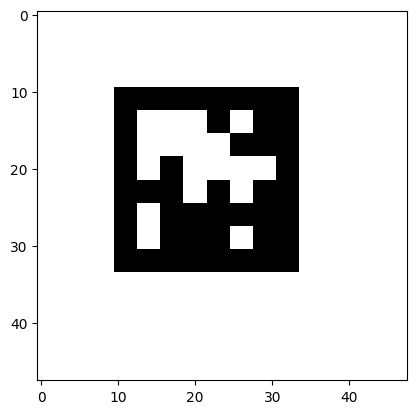

In [3]:
tg = TagGenerator2("tag36h11")
tag = tg.generate(4, scale=3)
r,c = tag.shape
im = 255*np.ones((2*r,2*c),dtype=np.uint8)
im[10:10+r,10:10+c] = tag

plt.imshow(im, cmap="gray");
# plt.axis("off");

In [15]:
at_detector = Detector(
   families="tag36h11",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

In [16]:
%timeit at_detector.detect(im)

198 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Gen 3 Tags

The detector is painfully *slow*

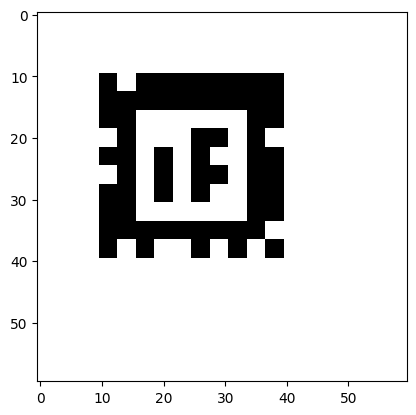

In [18]:
tg = TagGenerator3("tagStandard52h13")
tag = tg.generate(129, scale=3)
r,c = tag.shape
im = 255*np.ones((2*r,2*c),dtype=np.uint8)
im[10:10+r,10:10+c] = tag

plt.imshow(im, cmap="gray");

In [13]:
at_detector = Detector(
   families="tagStandard52h13",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

In [19]:
%timeit at_detector.detect(im)

207 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
